#***Importing libraries and dataframe***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('RJ-2022.csv')

#***Exploratory data analysis***

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,288,2023-03-01,1.86,1,264,19,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,624,3,86,2023-03-27,0.56,3,357,1,NaN
2,200568,30m of Ipa Beach e fins de semana special price !,980805,Henrique,NaN,Ipanema,-22.98586,-43.19411,Entire home/apt,100,30,198,2023-02-13,1.45,6,59,9,NaN
3,342874,Comfortable in Copacabana beach,829630,Luciana,NaN,Leme,-22.96392,-43.17263,Entire home/apt,236,2,159,2023-02-26,1.19,3,105,31,NaN
4,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,307,3,262,2023-03-27,1.68,1,257,14,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30476 entries, 0 to 30475
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30476 non-null  int64  
 1   name                            30458 non-null  object 
 2   host_id                         30476 non-null  int64  
 3   host_name                       30473 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   30476 non-null  object 
 6   latitude                        30476 non-null  float64
 7   longitude                       30476 non-null  float64
 8   room_type                       30476 non-null  object 
 9   price                           30476 non-null  int64  
 10  minimum_nights                  30476 non-null  int64  
 11  number_of_reviews               30476 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.047600e+04,3.047600e+04,0.0,30476.000000,30476.000000,30476.000000,30476.000000,30476.000000,22972.000000,30476.000000,30476.000000,30476.000000,0.0
mean,2.856845e+17,1.567930e+08,NaN,-22.967200,-43.250334,981.616912,4.854312,18.260172,1.014667,9.816118,210.453865,6.631940,NaN
std,3.618699e+17,1.608185e+08,NaN,0.035228,0.099710,8625.188625,24.354187,38.502717,1.082735,28.249902,136.075327,10.830069,NaN
min,1.787800e+04,3.607000e+03,NaN,-23.073276,-43.701286,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.857902e+07,2.072032e+07,NaN,-22.984780,-43.308549,200.000000,1.000000,1.000000,0.230000,1.000000,85.000000,0.000000,NaN
50%,4.813457e+07,8.374286e+07,NaN,-22.972620,-43.195535,350.000000,2.000000,4.000000,0.700000,2.000000,212.000000,2.000000,NaN
75%,7.052872e+17,2.773585e+08,NaN,-22.954726,-43.185841,650.000000,4.000000,17.000000,1.440000,4.000000,359.000000,8.000000,NaN
max,8.570784e+17,5.072126e+08,NaN,-22.749690,-43.104400,595793.000000,1125.000000,588.000000,17.010000,224.000000,365.000000,146.000000,NaN


***Some adjustments***

In [9]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True) #Drop empty columns
df.dropna(subset=['name', 'host_name'], inplace=True) #Drop rows with empty values in ['name', 'host_name'] columns
df.drop(df[df['price'] >= 5000].index, inplace=True) # Removing outliers

***Analysing neighbourhoods***

In [10]:
toppriceHoods = df.groupby('neighbourhood').price.mean().reset_index().sort_values('price', ascending=False).head() # Df with the top priced neighbourhoods
lowerpriceHoods = df.groupby('neighbourhood').price.mean().reset_index().sort_values('price').head() # Df with the top priced neighbourhoods

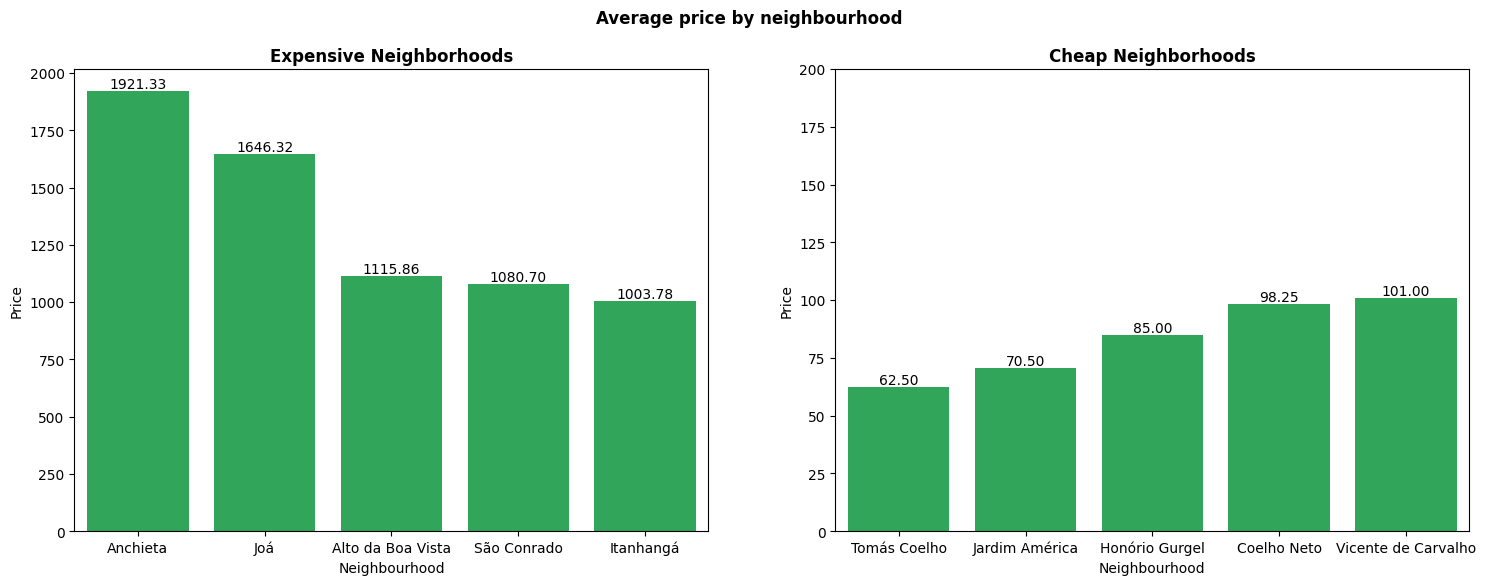

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=toppriceHoods, y='price', x='neighbourhood', color='#1DB954', ax=ax1)
ax1.set_title('Expensive Neighborhoods', fontweight='bold')
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Price')
sns.barplot(data=lowerpriceHoods, y='price', x='neighbourhood', color='#1DB954', ax=ax2)
ax2.set_title('Cheap Neighborhoods', fontweight='bold')
ax2.set_xlabel('Neighbourhood')
ax2.set_ylabel('Price')
ax2.set_ylim(0, 200)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

fig.suptitle('Average price by neighbourhood', fontweight='bold')
plt.show()

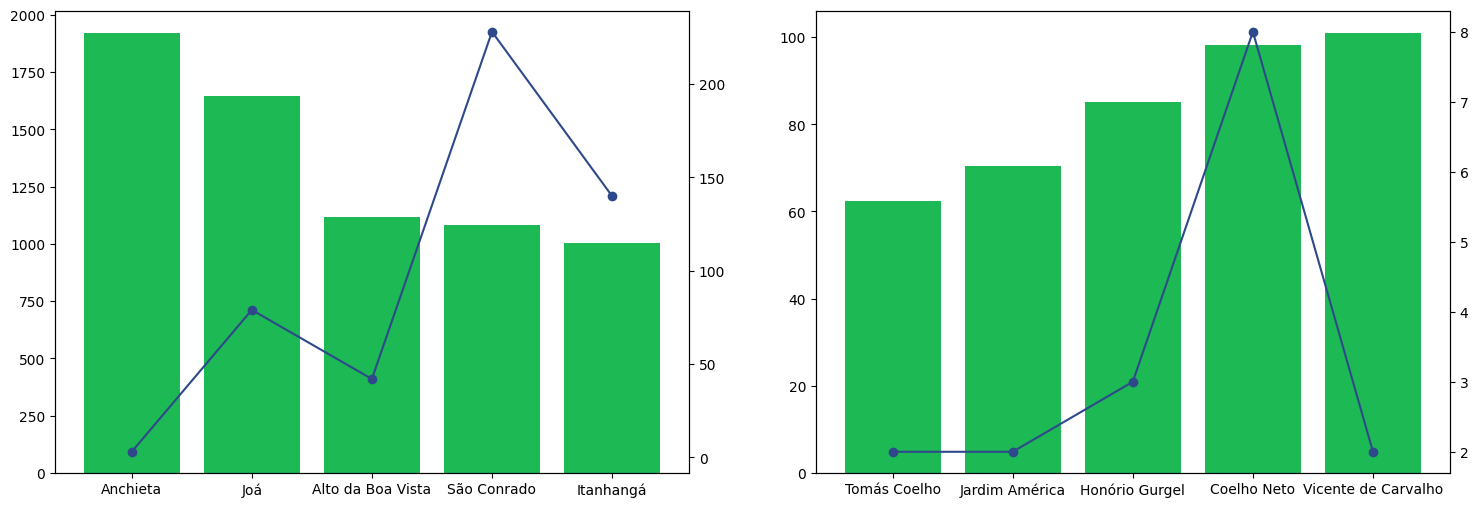

In [58]:
countRooms = df['neighbourhood'].value_counts().reset_index().rename(columns={'neighbourhood': 'count'})
top_hoods_count = pd.merge(toppriceHoods, countRooms, how='inner', left_on='neighbourhood', right_on='index').drop('index', axis=1)
lower_hoods_count = pd.merge(lowerpriceHoods, countRooms, how='inner', left_on='neighbourhood', right_on='index').drop('index', axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.bar(top_hoods_count['neighbourhood'], top_hoods_count['price'], color='#1DB954')
ax3 = ax1.twinx()
ax3.plot(top_hoods_count['neighbourhood'], top_hoods_count['count'], color='#2d498b', marker='o')

ax2.bar(lower_hoods_count['neighbourhood'], lower_hoods_count['price'], color='#1DB954')
ax4 = ax2.twinx()
ax4.plot(lower_hoods_count['neighbourhood'], lower_hoods_count['count'], color='#2d498b', marker='o')
fig.show()

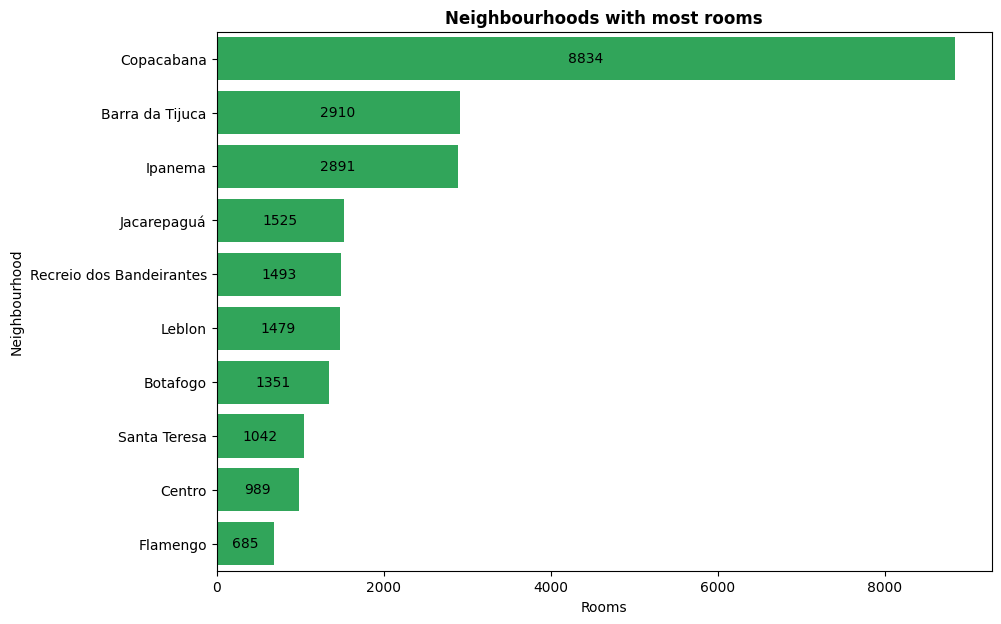

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y='neighbourhood', color='#1DB954',
              order=df['neighbourhood'].value_counts().index[:10])

plt.title('Neighbourhoods with most rooms', fontweight='bold')
plt.xlabel('Rooms')
plt.ylabel('Neighbourhood')

for i, count in enumerate(df['neighbourhood'].value_counts().values[:10]):
  plt.annotate(str(count), xy=(count / 2, i), ha='center', va='center')

fig.show()

In [14]:
import folium

m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = df[['latitude', 'longitude']].values.tolist()
folium.plugins.HeatMap(heat_data).add_to(m)
m

AttributeError: ignored